In [29]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt
from sklearn.metrics import mean_squared_error

In [30]:
df = pd.read_csv('./Tasla_Stock_Updated_V2.csv',encoding="latin-1",)
df.drop(df.columns[0], axis=1, inplace=True)

In [31]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [32]:
#Conversion data type column -  date from object to Datetime

df["Date"]=pd.to_datetime(df["Date"])

In [33]:
df.info() #show information feature data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2274 non-null   datetime64[ns]
 1   Open    2274 non-null   float64       
 2   High    2274 non-null   float64       
 3   Low     2274 non-null   float64       
 4   Close   2274 non-null   float64       
 5   Volume  2274 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.7 KB


In [34]:
# Shape of the Dataset
df.shape

(2274, 6)

In [35]:
# Check Null Values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [36]:
# Check Duplicate Values
df.duplicated().sum()

0

In [37]:
# look  describe data set
df.describe().round(2)

,Open,High,Low,Close,Volume
count,2274.00,2274.00,2274.00,2274.00,2.274000e+03
mean,103.49,105.77,101.04,103.46,1.142089e+08
std,111.14,113.61,108.40,111.03,7.688430e+07
min,9.49,10.33,9.40,9.58,1.062000e+07
25%,16.67,16.93,16.47,16.69,6.637762e+07
50%,23.22,23.55,22.84,23.20,9.359855e+07
75%,215.27,219.63,208.98,215.23,1.338214e+08
max,411.47,414.50,405.67,409.97,9.140820e+08


In [38]:
# make 2 column - Year & Month 

df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month

In [39]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,2015,1
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,2015,1
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500,2015,1
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000,2015,1
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500,2015,1


Text(0.5, 1.0, 'The relation between Date of High & low Value')

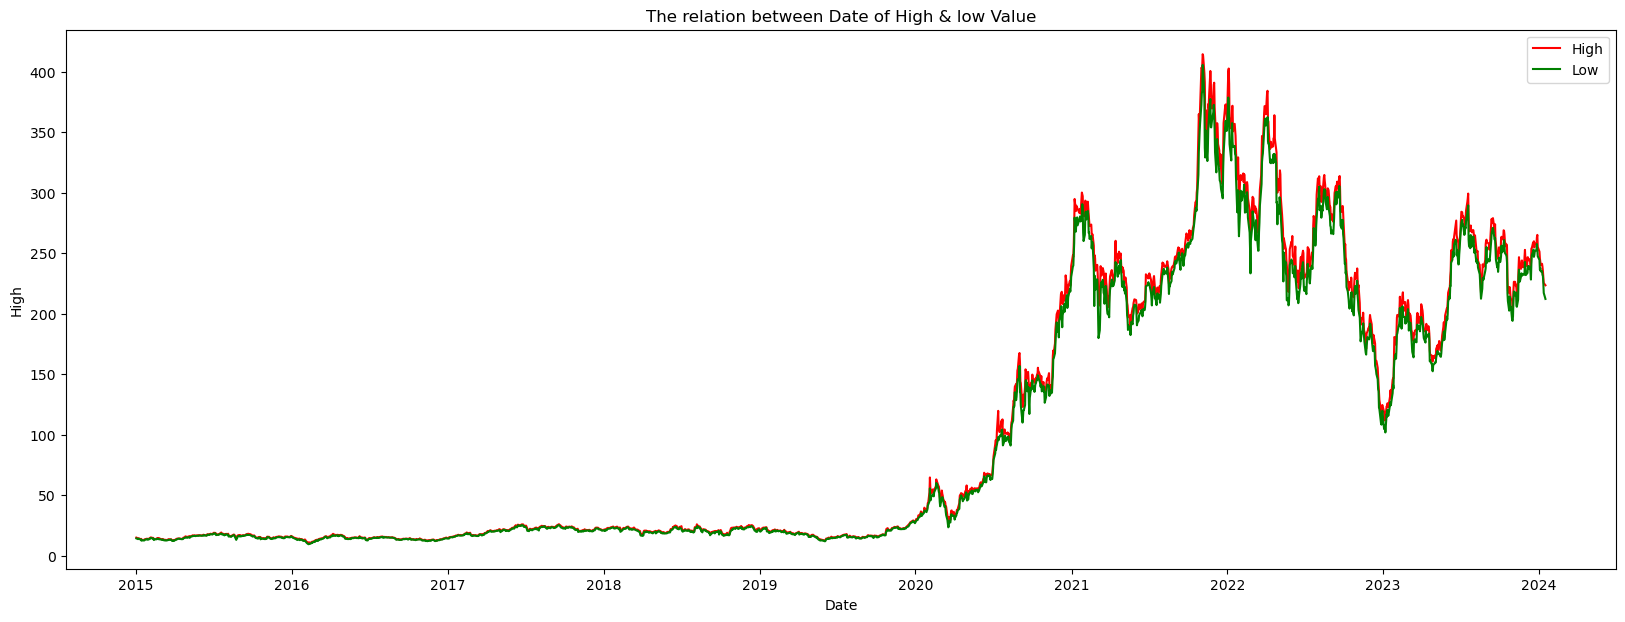

In [40]:
# show the relation between Date of High & Low value

plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="Date",y="High",color="red",label="High")
sns.lineplot(data=df,x="Date",y="Low",color="green",label="Low")

plt.title("The relation between Date of High & low Value")

Text(0.5, 1.0, 'The relation between  Date of Open & Close value')

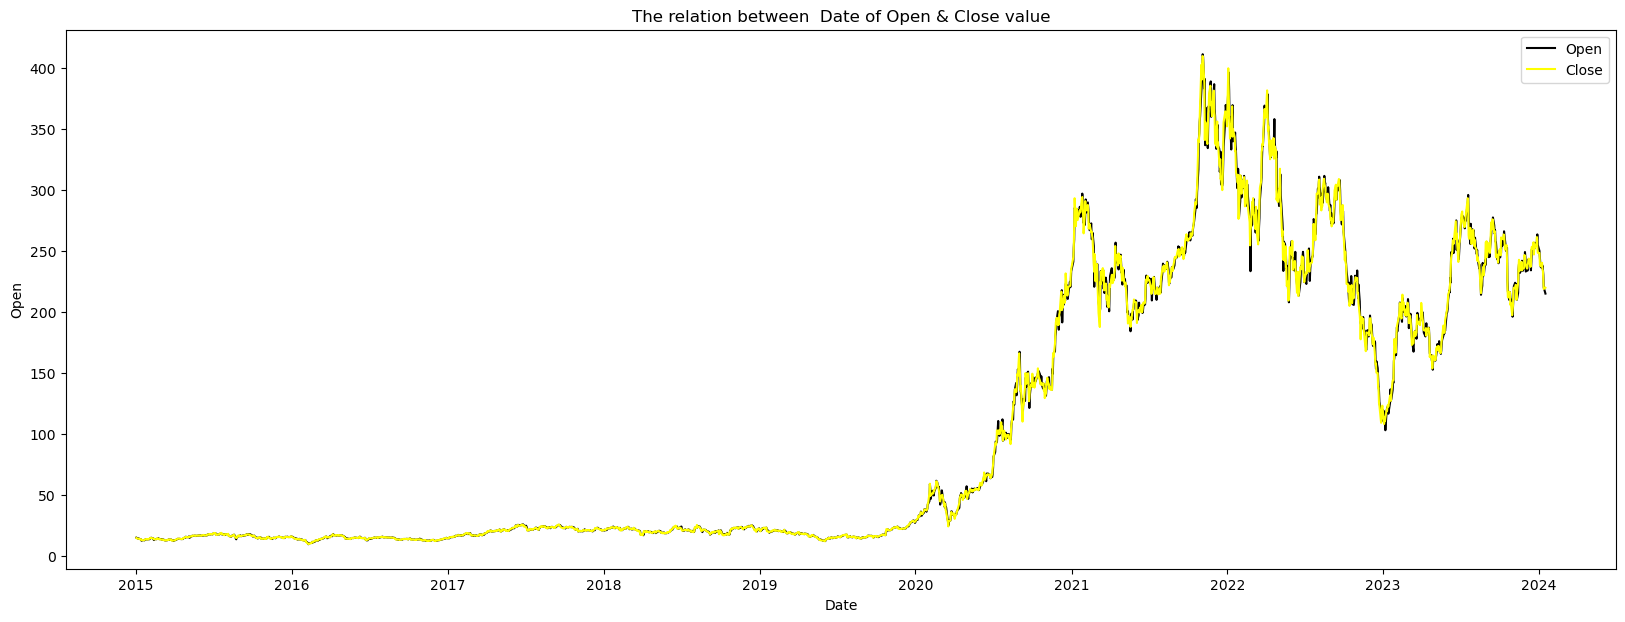

In [41]:
# show the relation between Date of Open & Close value

plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="Date",y="Open",color="black",label="Open")
sns.lineplot(data=df,x="Date",y="Close",color="yellow",label="Close")

plt.title("The relation between  Date of Open & Close value")

Text(0.5, 1.0, 'The relation between  Date of Volume')

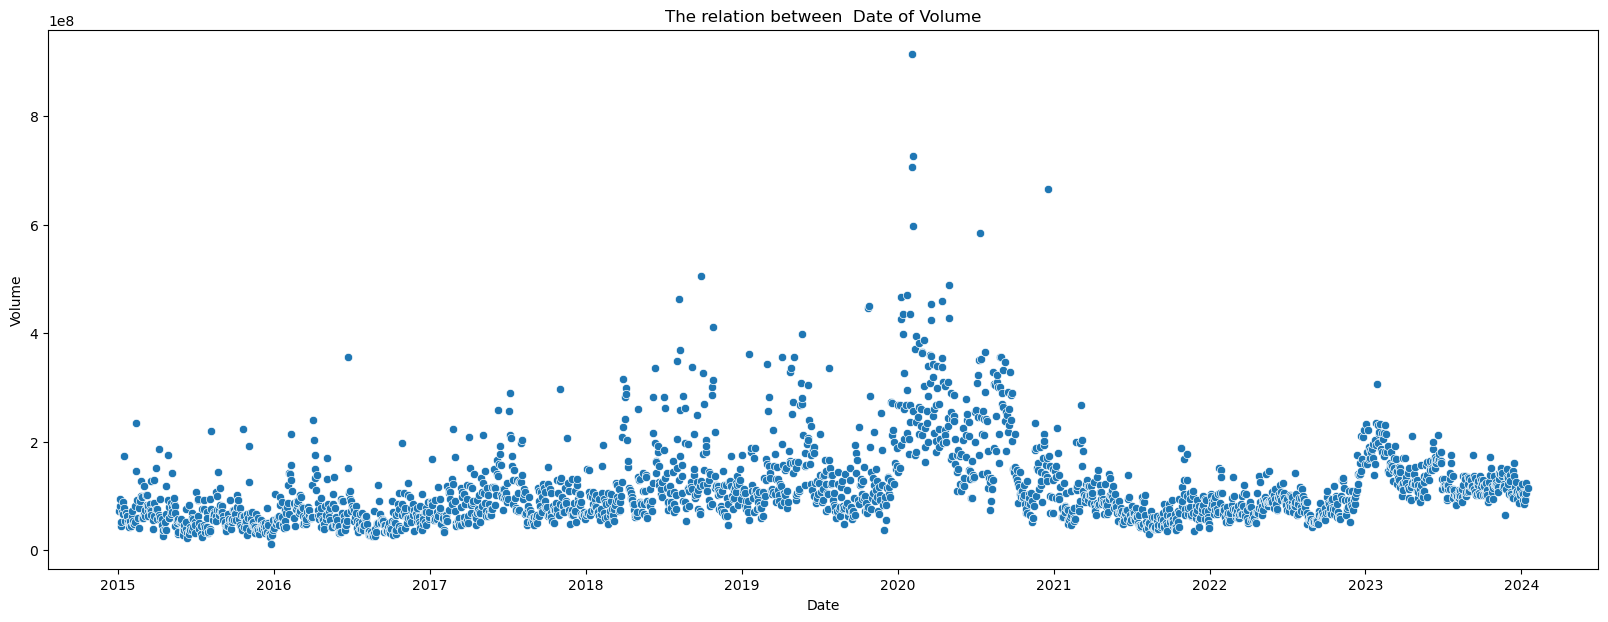

In [42]:
# show the relation between Date of Volume     

plt.figure(figsize=(20,7))
sns.scatterplot(data=df,x="Date",y="Volume",)

plt.title("The relation between  Date of Volume")

In [43]:
# make group by 

a=df.groupby("Year")['High','Low','Open','Close'].mean().round(2)
a

C:\Users\admin\AppData\Local\Temp\ipykernel_8496\1020841097.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=df.groupby("Year")['High','Low','Open','Close'].mean().round(2)


,High,Low,Open,Close
Year,,,,
2015,15.56,15.08,15.32,15.34
2016,14.23,13.75,14.00,13.98
2017,21.23,20.65,20.95,20.95
2018,21.58,20.70,21.15,21.15
2019,18.51,17.91,18.20,18.24
2020,99.10,93.57,96.37,96.67
2021,265.24,254.24,259.95,260.00
2022,270.57,256.51,264.14,263.09
2023,221.63,212.67,217.08,217.48


In [44]:
#Importing the basic librarires for building model

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression ,ARDRegression


In [45]:
df.drop(columns=["Date"],inplace=True)

In [46]:
df.head()

,Open,High,Low,Close,Volume,Year,Month
0,14.858000,14.883333,14.217333,14.620667,71466000,2015,1
1,14.303333,14.433333,13.810667,14.006000,80527500,2015,1
2,14.004000,14.280000,13.614000,14.085333,93928500,2015,1
3,14.223333,14.318667,13.985333,14.063333,44526000,2015,1
4,14.187333,14.253333,14.000667,14.041333,51637500,2015,1


In [47]:
#Defined X value and y value , and split the data train
X = df.drop(columns="Volume")           
y = df["Volume"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1591, 6)
X Test  :  (683, 6)
Y Train :  (1591,)
Y Test  :  (683,)


In [50]:
KNR = KNeighborsRegressor(n_neighbors=30,weights='distance',algorithm='brute',leaf_size=50, p=15)
KNR.fit(X_train,y_train)
pred=KNR.predict(X_test)
test_score = KNR.score(X_test, y_test)
print(f'Test score of test model: {test_score*100}')

Test score of test model: 50.13541503422808
